<a href="https://colab.research.google.com/github/MAHAMAT263/formative_II_group_assignments/blob/main/Juliana_Holder__formative_II_starter_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import tensorflow as tf
import random
from tensorflow.keras import layers, callbacks
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot
from sklearn.datasets import make_classification

In [20]:
#LOAD THE DATA

file_path = "/content/drive/My Drive/water_potability.csv"
df = pd.read_csv(file_path)

df = df.dropna()
X = df.drop('Potability', axis=1).values
y = df['Potability'].values
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


Plot the Data Appropriately

In [21]:

# Splitting the dataset
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Print the shapes to verify
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (1407, 9), (1407,)
Validation set: (302, 9), (302,)
Testing set: (302, 9), (302,)


# Each Memeber Defines their model Here

In [22]:
# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [23]:

# Define the neural network architecture
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Define input layer explicitly
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.4),  # Dropout to prevent overfitting
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [9]:
#Model Definition by member 2
def model_name_of_student():

  return

In [10]:
#Model Definition by member 3
def model_name_of_student():

  return

# Start the training Process

In [24]:
# Early Stopping to avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,  # Stop if val_loss doesn't improve for 7 epochs
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Train for a maximum of 50 epochs
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate on test data
y_pred = (model.predict(X_test) > 0.5).astype(int)




Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4678 - loss: 0.8114 - val_accuracy: 0.6126 - val_loss: 0.7239
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5759 - loss: 0.7372 - val_accuracy: 0.6060 - val_loss: 0.7201
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5912 - loss: 0.7303 - val_accuracy: 0.6192 - val_loss: 0.7138
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6146 - loss: 0.7188 - val_accuracy: 0.6192 - val_loss: 0.7091
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6232 - loss: 0.7005 - val_accuracy: 0.6159 - val_loss: 0.7073
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5977 - loss: 0.7125 - val_accuracy: 0.6159 - val_loss: 0.7015
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6351 - loss: 0.6912 - val_accuracy: 0.6358 - val_loss: 0.6985
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6348 - loss: 0.6889 - val_accuracy: 0.6457 - val_lo

In [25]:
# Model evaluation
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, val_acc = model.evaluate(X_val, y_val, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Validation Accuracy: {val_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

Train Accuracy: 0.724
Validation Accuracy: 0.722
Test Accuracy: 0.646


In [26]:
from sklearn.metrics import classification_report


report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)




              precision    recall  f1-score     support
0              0.656652  0.850000  0.740920  180.000000
1              0.608696  0.344262  0.439791  122.000000
accuracy       0.645695  0.645695  0.645695    0.645695
macro avg      0.632674  0.597131  0.590355  302.000000
weighted avg   0.637279  0.645695  0.619272  302.000000


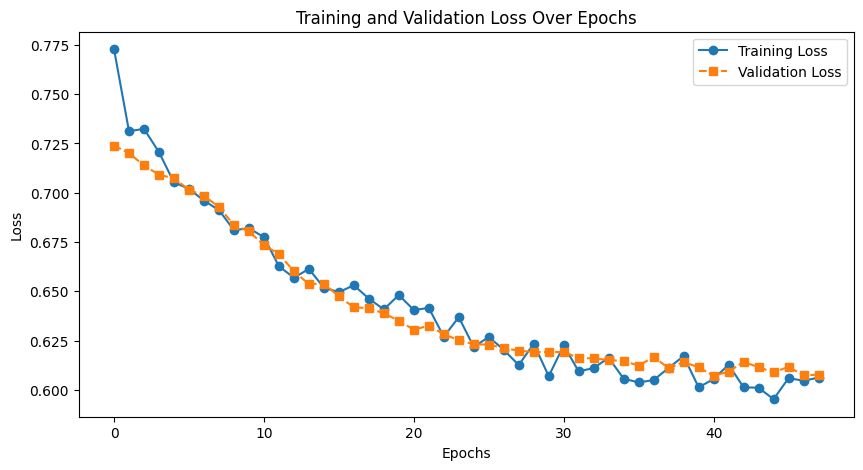

In [27]:
# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


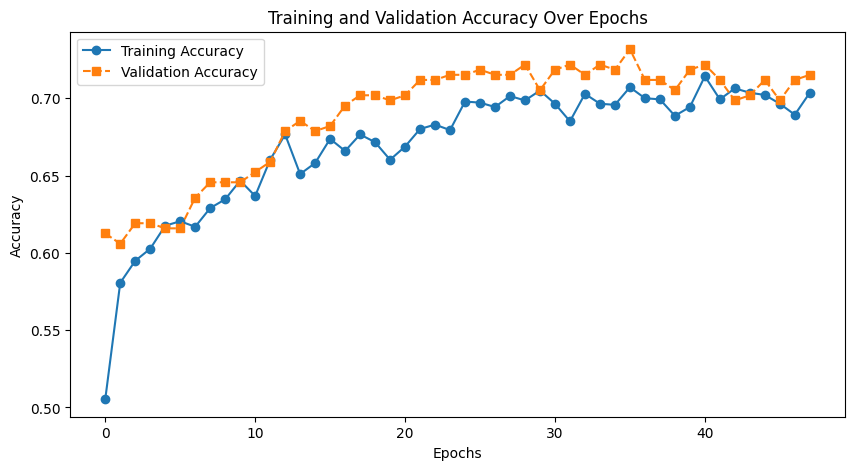

In [28]:
# Plot training & validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

In [29]:
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Loss: {final_train_loss:.3f}")
print(f"Final Validation Loss: {final_val_loss:.3f}")



Final Training Loss: 0.606
Final Validation Loss: 0.608


In [30]:
print("Final Dataset Shape:", df.shape)


Final Dataset Shape: (2011, 10)


 **Training** **summary table**

| Member Name     | Regularization technique | Optimizer | Early Stopping Criteria       | Dropout Rate                   | Train Accuracy | Validation Accuracy | Test Accuracy |
|------------------|-------------|-----------|-------------------------------|--------------------------------|----------------|----------------------|---------------|
| Juliana Holder    | L2      | Adam   | Monitor: val_loss, Patience: 7 | 0.25 (Layer 1), 0.4 (Layer 2) |  0.724   | 0.722`           | *0.646*`    |

